# 20190729 update - Chris
1. `boundary_distance` query strategy 
    - using variables from `classifier` parameter 

# 20190725 update - Chris
1. `draw_plot_multi_line` function: 
   - draw all performance and baseline together
   - 3 parameters in total 
2. `draw_plot` set y limit to 50%-80%
3. how to install `XGBoost` package
4. calculate distance from each data point to decision boundary

**for all the updates above please search relevant keywords**

# Train the data - Henry

In [1]:
import pandas as pd
df = pd.read_csv("preprocessed_all.csv",encoding="utf-8")
df
#col_names = list(df)
#print(col_names)

,Unnamed: 0,ID,work_name,work_detail,work_description,edu_name,edu_detail,edu_description,current_city_name,hometown_name,...,Major-Society,friend_count,post_amount_10,post_shared_10,post_frequency_10,post_amount_20,post_shared_20,post_frequency_20,post_year_count,LABEL
0,0,502194887,['Empty'],['Empty'],['Empty'],['Empty'],['Empty'],['Empty'],['Empty'],['Empty'],...,0,0,0,0.00,0.00039,0,0.00,0.00039,0,1
1,1,566312536,['Empty'],['Empty'],['Empty'],['Empty'],['Empty'],['Empty'],"['Taipei, Taiwan']","['Taipei, Taiwan']",...,0,0,0,0.00,0.00185,0,0.00,0.00185,1,1
2,2,579111932,['慈心華德福實驗高中'],"['導師 · August 25, 2014 to present']",['Empty'],['國立臺南大學'],"['Class of 2015 · 教育學系課程與教學碩士班 · Tainan, Taiwan']",['Empty'],['Luodong'],"['Tainan, Taiwan']",...,1,0,1,0.00,0.00444,0,0.00,0.00444,1,1
3,3,600221657,['Empty'],['Empty'],['Empty'],['Empty'],['Empty'],['Empty'],['Empty'],['Empty'],...,0,143,1,0.00,0.00384,1,0.00,0.00661,2,1
4,4,604890860,['NTT Taiwan'],['Empty'],['Empty'],"['Waseda University', 'University of Toronto',...","['Class of 2002 · Shinjuku', 'Class of 1999 · ...","['Empty', 'Empty', 'Empty']","['Taipei, Taiwan']","['Taipei, Taiwan']",...,0,0,0,0.00,0.00260,0,0.00,0.00260,0,1
5,5,636833481,['Empty'],['Empty'],['Empty'],"['景興國小', '景興國中', '新北市能仁家商', '致遠管理學院(台灣首府大學)']","['Taipei, Taiwan', 'Taipei, Taiwan', 'Empty', ...","['Empty', 'Empty', 'Empty', 'Empty']","['Taipei, Taiwan']","['Taipei, Taiwan']",...,1,290,1,0.00,0.01044,1,0.00,0.01803,1,1
6,6,673150550,['Empty'],['Empty'],['Empty'],['Empty'],['Empty'],['Empty'],['Empty'],['Empty'],...,0,0,1,0.00,0.00391,1,0.00,0.00700,1,1
7,7,676121841,"['美商安邁科技股份有限公司', 'Acer Inc.', '亞矽科技']","['October 1, 2017 to present', 'G.s.a · Octobe...","['Empty', 'Empty', 'Empty']","['台北市立松山高中', 'National Taipei University', '臺北...","['Class of 2000 · Taipei, Taiwan', 'Taipei, Ta...","['Empty', 'Empty', 'Empty']","['Taipei, Taiwan']","['Taipei, Taiwan']",...,0,286,1,0.10,0.00395,0,0.08,0.00157,3,1
8,8,711577239,"['QNAP', 'GSS 叡揚資訊']",['Senior Software Engineer · September 2015 to...,"['Empty', 'Empty']","['National Taiwan Normal University', 'Nationa...",['Class of 2013 · PhD · Computer science · Tai...,"['Empty', 'Empty', 'Empty', 'Empty']","['Taipei, Taiwan']",['Yilan City'],...,0,646,1,0.40,0.02188,1,0.25,0.03236,0,1
9,9,786258144,['Empty'],['Empty'],['Empty'],"['桃園縣立南崁高級中學', '南崁高中']","['Taoyuan District, Taoyuan', 'Taoyuan Distric...","['Empty', 'Empty']","['Taoyuan District, Taoyuan']",['Empty'],...,0,0,1,0.70,0.04739,1,0.70,0.07117,0,1


In [2]:
import sklearn
import numpy as np
from sklearn.utils import shuffle
# -11 is the hometown_continent which should be removed
# feature = np.append(np.arange(-37,-19),np.arange(-18,-1))
# feature = np.append(np.arange(-25,-7),np.arange(-6,-1))
feature = [-30,-18,-17,-16,-15,-14,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2]
#print(np.median(df.iloc[:,[-19]]),np.mean(df.iloc[:,[-19]]))
df = shuffle(df)
X = df.iloc[:, feature].values
y = df.iloc[:,[-1]].values
# print(feature)
print(df.columns[feature])
# print(len(df.columns[feature]))
for i in range(-37,0):
    print(i,df.columns[i])

# Indicies of each class' observations
#df.iloc[:, [-17,-16,-15,-14,-13, -12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2]]

Index(['edu_rank', 'Continent-Africa', 'Continent-Americas', 'Continent-Asia',
       'Continent-Empty', 'Continent-Europe', 'Major-Others', 'Major-Science',
       'Major-Society', 'friend_count', 'post_amount_10', 'post_shared_10',
       'post_frequency_10', 'post_amount_20', 'post_shared_20',
       'post_frequency_20', 'post_year_count'],
      dtype='object')
-37 work_name_count
-36 edu_name_count
-35 Languages_name_count
-34 relation_plus_fam_name_count
-33 life_event_detail_count
-32 all_social_count
-31 all_feature_count
-30 edu_rank
-29 male_rank
-28 female_rank
-27 no_gender_rank
-26 Religion_rank
-25 Blood-A
-24 Blood-AB
-23 Blood-B
-22 Blood-Empty
-21 Blood-O
-20 current_city_is_six_cities
-19 hometown_continent
-18 Continent-Africa
-17 Continent-Americas
-16 Continent-Asia
-15 Continent-Empty
-14 Continent-Europe
-13 is_EECS
-12 Major-Others
-11 Major-Science
-10 Major-Society
-9 friend_count
-8 post_amount_10
-7 post_shared_10
-6 post_frequency_10
-5 post_amount_20
-4 po

In [4]:
#upsampling using SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=386)
i_class0 = np.where(y_train == 0)[0]
i_class1 = np.where(y_train == 1)[0]
print(X_train.shape)

sm = SMOTE(random_state=12, ratio = 1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

#test
i_class0 = np.where(y_train == 0)[0]
i_class1 = np.where(y_train == 1)[0]
n_class0 = len(i_class0)
n_class1 = len(i_class1)
print('0:',n_class0,' 1:',n_class1)

(696, 17)
0: 495  1: 495


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
'''
#upsampling in common way
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=386)
i_class0 = np.where(y_train == 0)[0]
i_class1 = np.where(y_train == 1)[0]

# Number of observations in each class
n_class0 = len(i_class0)
n_class1 = len(i_class1)
print('0:',n_class0,' 1:',n_class1)
# For every observation in class 1, randomly sample from class 0 with replacement
i_class0_upsampled = np.random.choice(i_class0, size=n_class1, replace=True)

# Join together class 0's upsampled target vector with class 1's target vector
y_train = np.concatenate((y_train[i_class0_upsampled], y_train[i_class1]))
X_train = np.concatenate((X_train[i_class0_upsampled], X_train[i_class1]))

#test
i_class0 = np.where(y_train == 0)[0]
i_class1 = np.where(y_train == 1)[0]
n_class0 = len(i_class0)
n_class1 = len(i_class1)
print('0:',n_class0,' 1:',n_class1)
'''

"\n#upsampling in common way\nfrom sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=386)\ni_class0 = np.where(y_train == 0)[0]\ni_class1 = np.where(y_train == 1)[0]\n\n# Number of observations in each class\nn_class0 = len(i_class0)\nn_class1 = len(i_class1)\nprint('0:',n_class0,' 1:',n_class1)\n# For every observation in class 1, randomly sample from class 0 with replacement\ni_class0_upsampled = np.random.choice(i_class0, size=n_class1, replace=True)\n\n# Join together class 0's upsampled target vector with class 1's target vector\ny_train = np.concatenate((y_train[i_class0_upsampled], y_train[i_class1]))\nX_train = np.concatenate((X_train[i_class0_upsampled], X_train[i_class1]))\n\n#test\ni_class0 = np.where(y_train == 0)[0]\ni_class1 = np.where(y_train == 1)[0]\nn_class0 = len(i_class0)\nn_class1 = len(i_class1)\nprint('0:',n_class0,' 1:',n_class1)\n"

In [6]:
from sklearn.preprocessing import StandardScaler
print(X_train)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train.shape,X_train_std.shape)

[[5.10000000e+01 0.00000000e+00 0.00000000e+00 ... 6.50000000e-01
  2.00800000e-02 2.00000000e+00]
 [5.10000000e+01 0.00000000e+00 0.00000000e+00 ... 1.40000000e-01
  3.11000000e-03 0.00000000e+00]
 [5.10000000e+01 0.00000000e+00 0.00000000e+00 ... 5.00000000e-01
  4.04900000e-02 1.00000000e+01]
 ...
 [2.31128374e+01 0.00000000e+00 0.00000000e+00 ... 3.27432517e-01
  1.19075957e-02 0.00000000e+00]
 [5.10000000e+01 0.00000000e+00 0.00000000e+00 ... 3.82867420e-01
  4.05161573e-02 9.75842287e+00]
 [5.10000000e+01 0.00000000e+00 0.00000000e+00 ... 2.71047909e-01
  5.80384706e-02 1.04209582e+01]]
(990, 17) (990, 17)


## SVM linear

In [7]:
from sklearn.svm import SVC
from sklearn import metrics
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

y_pred1 = svm.predict(X_test_std)
#accuracy_svm = metrics.accuracy_score(y_test, y_pred1)
accuracy_svm = svm.score(X_test_std, y_test)
print('accuracy: ',accuracy_svm)
print(y_pred1)
f1_svm_linear = metrics.f1_score(y_test, y_pred1, average='weighted')
print("f1: ",f1_svm_linear)

accuracy:  0.745819397993311
[1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0
 1 1 1]
f1:  0.7436749950816447


In [8]:
#feature importance 
print("svm linear feature importance:")
feat_labels = df.iloc[:, feature].columns[0:]
importances = svm.coef_[0]

indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

svm linear feature importance:
 1) edu_rank                       0.558600
 2) post_frequency_10              0.447452
 3) post_shared_20                 0.269279
 4) Major-Others                   0.239240
 5) post_amount_10                 0.146463
 6) post_year_count                0.124912
 7) Major-Society                  0.121845
 8) Continent-Empty                0.068664
 9) Continent-Asia                 0.030734
10) Continent-Africa               0.002339
11) Continent-Americas             -0.005315
12) post_amount_20                 -0.106221
13) post_frequency_20              -0.259024
14) Major-Science                  -0.340771
15) friend_count                   -0.390314
16) Continent-Europe               -0.507619
17) post_shared_10                 -0.539542


In [9]:
#tuning svm linear
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#pipe_svc = Pipeline([('scl', StandardScaler()),('clf', SVC(random_state=1))])

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

tuned_parameters = [{'kernel': ['linear'], 'C': param_range}]
score = 'precision'
clf1 = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf1.fit(X_train_std, y_train)

print(clf1.best_score_)
print(clf1.best_params_)

0.7202020202020202
{'C': 0.1, 'kernel': 'linear'}


In [10]:
accuracy_svm = clf1.score(X_test_std, y_test)
print('accuracy: ',accuracy_svm)

accuracy:  0.7591973244147158


In [ ]:
# calculate each data point to desicion boundary distance
# ref:https://stackoverflow.com/questions/32074239/sklearn-getting-distance-of-each-point-from-decision-boundary
y = svm.decision_function(X_train_std)
w_norm = np.linalg.norm(svm.coef_)
dist = y / w_norm
dist

## SVM rbf

In [11]:
svm2 = SVC(kernel='rbf',C=100.0, gamma=0.001,class_weight='balanced')
svm2.fit(X_train_std, y_train)

y_pred2 = svm2.predict(X_test_std)
#accuracy_rbf = metrics.accuracy_score(y_test, y_pred2)
accuracy_rbf = svm2.score(X_test_std, y_test)
print('accuracy: ',accuracy_rbf)
print(y_pred2)

f1_svm_rbf = metrics.f1_score(y_test, y_pred2, average='weighted')
print("f1: ",f1_svm_rbf)

accuracy:  0.7491638795986622
[1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0
 1 1 1]
f1:  0.7450470221288201


In [12]:
#tuning svm rbf
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#pipe_svc = Pipeline([('scl', StandardScaler()),('clf', SVC(random_state=1))])

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]


tuned_parameters = [{'kernel': ['rbf'], 'gamma': param_range,
                     'C': param_range},]
score = 'precision'
clf2 = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf2.fit(X_train_std, y_train)

print(clf2.best_score_)
print(clf2.best_params_)

0.796969696969697
{'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}


In [13]:
accuracy_rbf = clf2.score(X_test_std, y_test)
print('accuracy: ',accuracy_rbf)

accuracy:  0.7424749163879598


## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(n_estimators=100 , n_jobs=-1 , random_state=386, max_depth = 20, min_samples_split = 2,min_samples_leaf = 5,oob_score = True)
forest.fit(X_train_std, y_train)

y_pred3 = forest.predict(X_test_std)
#accuracy_rf = accuracy_score(y_test, y_pred3)
accuracy_rf = forest.score(X_test_std, y_test)
print('accuracy: ',accuracy_rf)
print(y_pred3)

f1_rf = metrics.f1_score(y_test, y_pred3, average='weighted')
print("f1: ",f1_rf)

accuracy:  0.7591973244147158
[1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1
 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0
 0 1 1]
f1:  0.7578751832874772


In [15]:
#feature importance
print("random forest feature importance:")
feat_labels = df.iloc[:, feature].columns[0:]
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

random forest feature importance:
 1) friend_count                   0.185262
 2) Major-Others                   0.126941
 3) edu_rank                       0.116969
 4) Major-Science                  0.086983
 5) post_shared_10                 0.082096
 6) post_frequency_20              0.076943
 7) post_frequency_10              0.076544
 8) post_shared_20                 0.061647
 9) post_year_count                0.048176
10) Continent-Asia                 0.045903
11) Continent-Empty                0.045142
12) Major-Society                  0.022035
13) post_amount_20                 0.011921
14) Continent-Europe               0.007151
15) post_amount_10                 0.006288
16) Continent-Americas             0.000000
17) Continent-Africa               0.000000


In [16]:
#tuning forest
from sklearn.model_selection import GridSearchCV

Forest = RandomForestClassifier(n_jobs=-1, random_state=386,oob_score = True)

tuned_parameters = [{'n_estimators': [100,200,400,600,800], 'max_depth': [10, 20, 30, 40, 50],
                     'min_samples_leaf': [1, 2, 4],'min_samples_split': [2, 5, 10]}]
score = 'precision'
#clf = GridSearchCV(Forest, tuned_parameters, cv=3, scoring='%s_weighted' % score)
clf3 = GridSearchCV(Forest, tuned_parameters, cv=3)
clf3.fit(X_train_std, y_train)

print(clf3.best_score_)
print(clf3.best_params_)

0.8161616161616162
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [17]:
accuracy_rf = clf3.score(X_test_std, y_test)
print('accuracy: ',accuracy_rf)

accuracy:  0.7692307692307693


## Xgboost

### *Xgboost for [Win10 x64, python37] is not availiable official Pypi 
1. go to [here](https://www.lfd.uci.edu/~gohlke/pythonlibs/)
2. search for XGboost and download corresponding version
3. `pip install` the `.whl`

In [18]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train_std, y_train)
y_pred4 = xgbc.predict(X_test_std)

accuracy_xgbc = xgbc.score(X_test_std, y_test)
print("accuracy:",accuracy_xgbc)
f1_xgbc = metrics.f1_score(y_test, y_pred4, average='weighted')
print("f1: ",f1_xgbc)

accuracy: 0.7391304347826086
f1:  0.7352837048434755


In [19]:
#feature importance
print("xgboost feature importance:")
feat_labels = df.iloc[:, feature].columns[0:]
importances = xgbc.feature_importances_

indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

xgboost feature importance:
 1) Major-Others                   0.396973
 2) Continent-Empty                0.143514
 3) Major-Society                  0.063825
 4) friend_count                   0.063773
 5) Major-Science                  0.055871
 6) edu_rank                       0.055758
 7) Continent-Asia                 0.041092
 8) post_shared_10                 0.034431
 9) post_frequency_20              0.032107
10) post_year_count                0.031127
11) post_frequency_10              0.021557
12) post_shared_20                 0.020131
13) post_amount_10                 0.019842
14) post_amount_20                 0.010708
15) Continent-Europe               0.009292
16) Continent-Americas             0.000000
17) Continent-Africa               0.000000


In [20]:
#tuning XGBoost
parameters = {
              'max_depth': [5, 10],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [100,250,500],
              'subsample': [0.6, 0.8, 0.95],
              'reg_alpha': [0,  0.5, 1],
              'reg_lambda': [0.2,  0.6,  1],
              'scale_pos_weight': [0.4, 0.6]
}
xlf = XGBClassifier(max_depth=10,
			learning_rate=0.1,
			n_estimators=100,
			silent=True,
			objective='binary:logistic',
			nthread=-1,
			gamma=0,
			min_child_weight=1,
			max_delta_step=0,
			subsample=0.85,
			colsample_bytree=0.7,
			colsample_bylevel=1,
			reg_alpha=0,
			reg_lambda=1,
			scale_pos_weight=1,
			seed=1440,
			missing=None)
			
clf4 = GridSearchCV(xlf, param_grid=parameters, scoring='accuracy', cv=3)
clf4.fit(X_train_std, y_train)
print(clf4.best_score_)
print(clf4.best_params_)


0.802020202020202
{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 250, 'reg_alpha': 0.5, 'reg_lambda': 0.2, 'scale_pos_weight': 0.6, 'subsample': 0.6}


## Adaboost

In [21]:
from sklearn.ensemble import AdaBoostClassifier
adac = AdaBoostClassifier()
adac.fit(X_train_std, y_train)
y_pred5 = adac.predict(X_test_std)

accuracy_adac = adac.score(X_test_std, y_test)
print("accuracy:",accuracy_adac)
f1_adac = metrics.f1_score(y_test, y_pred5, average='weighted')
print("f1: ",f1_adac)

accuracy: 0.7558528428093646
f1:  0.7501273838188453


In [22]:
#feature importance
print("adaboost feature importance:")
feat_labels = df.iloc[:, feature].columns[0:]
importances = adac.feature_importances_

indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

adaboost feature importance:
 1) friend_count                   0.240000
 2) Continent-Asia                 0.140000
 3) post_shared_10                 0.100000
 4) Major-Science                  0.080000
 5) post_frequency_10              0.080000
 6) post_frequency_20              0.080000
 7) post_shared_20                 0.060000
 8) post_year_count                0.040000
 9) Continent-Empty                0.040000
10) edu_rank                       0.040000
11) post_amount_10                 0.040000
12) Major-Others                   0.020000
13) Continent-Europe               0.020000
14) Major-Society                  0.020000
15) post_amount_20                 0.000000
16) Continent-Americas             0.000000
17) Continent-Africa               0.000000


## Plotting

In [23]:
#accuracy
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

label_list = ['svm linear', 'svm rbf', 'random forest', 'xgboost','adaboost'] 
num_list = [accuracy_svm, accuracy_rbf, accuracy_rf, accuracy_xgbc, accuracy_adac]
rect1 = plt.bar(label_list,num_list)
plt.ylim(0.6, 0.85) 
plt.ylabel("Prediction Accuracy",fontsize=12)
plt.xlabel("Classification Method",fontsize=12)
plt.title("Accuracy Chart", fontsize=16)

for rect in rect1:
    height = rect.get_height()
    height = round(height,4)
    plt.text(rect.get_x() + rect.get_width() / 2, height+0.005, str(height), ha="center", va="bottom")

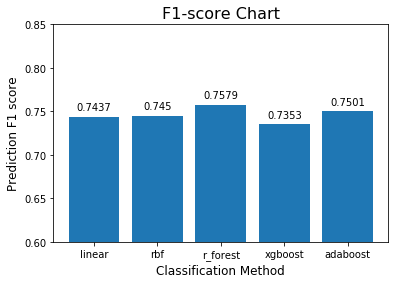

In [24]:
#f1 score

label_list = ['linear', 'rbf', 'r_forest', 'xgboost','adaboost'] 
num_list = [f1_svm_linear, f1_svm_rbf, f1_rf, f1_xgbc, f1_adac]
rect2 = plt.bar(label_list,num_list)
plt.ylim(0.6, 0.85) 
plt.ylabel("Prediction F1 score", fontsize=12)
plt.xlabel("Classification Method", fontsize=12)
plt.title("F1-score Chart", fontsize=16)

for rect in rect2:
    height = rect.get_height()
    height = round(height,4)
    plt.text(rect.get_x() + rect.get_width() / 2, height+0.005, str(height), ha="center", va="bottom")

D:\Program_Files\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0, 0.5, 'LABEL=1 probability')

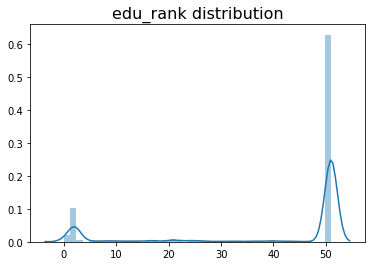

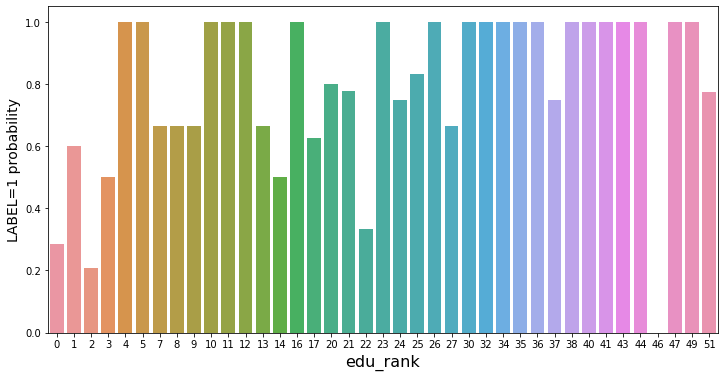

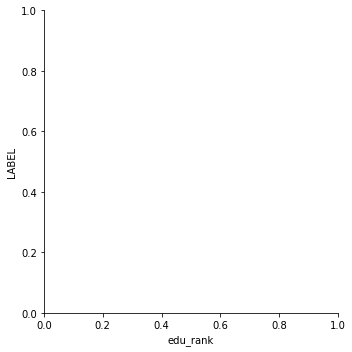

In [25]:
#edu_rank
df2 = pd.read_csv("preprocessed_all.csv",encoding="utf-8")
g = sns.distplot(df2[['edu_rank']]).set_title('edu_rank distribution',fontsize=16)

g2, ax = plt.subplots(figsize = (12,6))
sns.factorplot(x="edu_rank",y="LABEL",data=df2,ax=ax,kind="bar",ci=None)
ax.set_xlabel('edu_rank',fontsize=16)
ax.set_ylabel('LABEL=1 probability',fontsize=14)

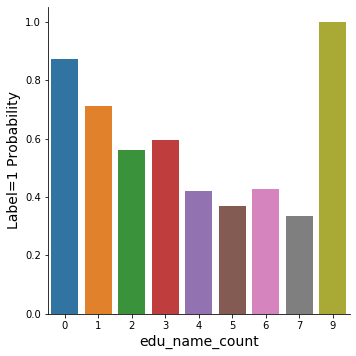

In [26]:
#edu_name_count

g = sns.factorplot(x="edu_name_count",y="LABEL",data=df2,kind="bar",ci=None)
g = g.set_ylabels("Label=1 Probability", fontsize=14)
g = g.set_xlabels("edu_name_count", fontsize=14)
#g = g = sns.countplot(x="male_rank",data=df2,palette="Greens_d")


Text(0, 0.5, 'LABEL=1 probability')

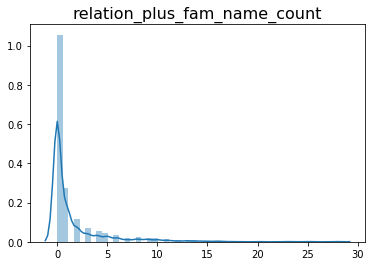

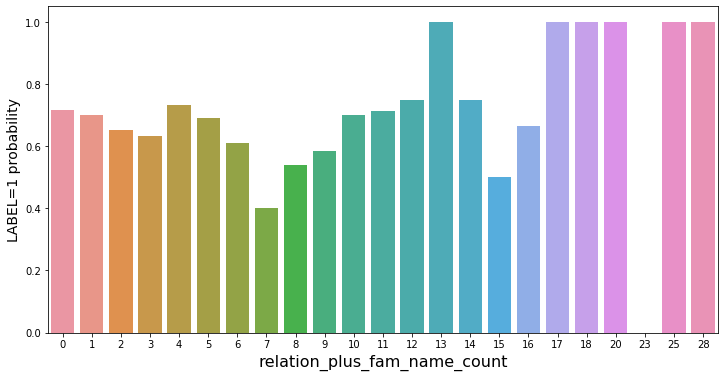

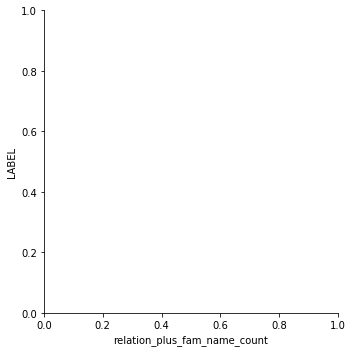

In [27]:
g = sns.distplot(df2[['relation_plus_fam_name_count']]).set_title('relation_plus_fam_name_count',fontsize=16)

g5, ax = plt.subplots(figsize = (12,6))
sns.factorplot(x="relation_plus_fam_name_count",y="LABEL",data=df2,ax=ax,kind="bar",ci=None)
ax.set_xlabel('relation_plus_fam_name_count',fontsize=16)
ax.set_ylabel('LABEL=1 probability',fontsize=14)


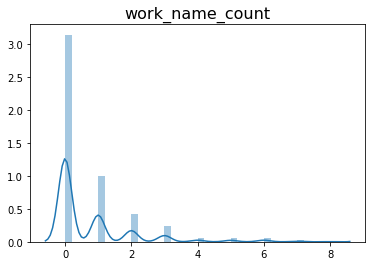

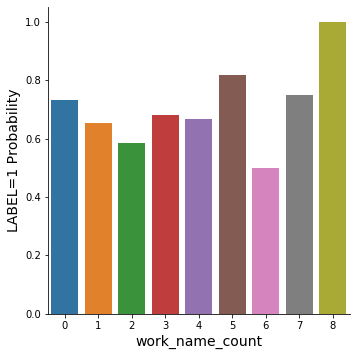

In [28]:
g = sns.distplot(df2[['work_name_count']]).set_title('work_name_count',fontsize=16)

g = sns.factorplot(x="work_name_count",y="LABEL",data=df2,kind="bar",ci=None)
g = g.set_ylabels("LABEL=1 Probability", fontsize=14)
g = g.set_xlabels("work_name_count", fontsize=14)

Text(0, 0.5, 'Data count')

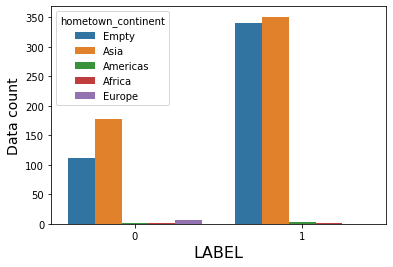

In [29]:
g = sns.countplot(x="LABEL",hue = "hometown_continent", data=df2);
g.set_xlabel("LABEL",fontsize=16)
g.set_ylabel("Data count",fontsize=14)

Text(0, 0.5, 'Data count')

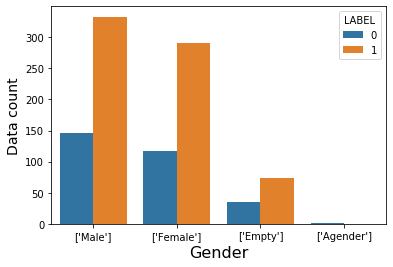

In [30]:
g = sns.countplot(x="Gender",hue = "LABEL", data=df2);
g.set_xlabel("Gender",fontsize=16)
g.set_ylabel("Data count",fontsize=14)

## Active Learning

In [32]:
#import library
from modAL.models import ActiveLearner
from modAL.uncertainty import entropy_sampling
import matplotlib.pyplot as plt
import matplotlib as mpl
from functools import partial
from modAL.batch import uncertainty_batch_sampling

from typing import Tuple
from scipy.stats import entropy
from sklearn.exceptions import NotFittedError
from sklearn.base import BaseEstimator
from modAL.utils.data import modALinput
from modAL.utils.selection import multi_argmax, shuffled_argmax
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import cross_val_score
import random

In [33]:
#initialize each active learner parameter
def init_param():
    # raw data for test
    global X_train_std,y_train
    np_raw_X = X_train_std
    np_raw_Y = y_train
    
    # train data for active learner
    #idx = np.random.randint(X_train_std.shape[0], size=40)
    global idx
    print(idx)
    np_train_X = X_train_std[idx, :]
    np_train_Y = y_train[idx]
    #print(np_train_Y.shape)
    
    # the data pool without label
    np_pool_X = X_train_std
    np_pool_X = np.delete(np_pool_X, idx, 0)

    np_pool_Y = y_train
    np_pool_Y = np.delete(np_pool_Y, idx, 0)
    
    return np_raw_X,np_raw_Y,np_train_X,np_train_Y,np_pool_X,np_pool_Y

In [34]:
#initialize each active learner parameter with kfold
def init_param2():
    # raw data for test
    global train_idx,X_train_std,y_train
    np_raw_X = X_train_std[train_idx, :]
    np_raw_Y = y_train[train_idx]
    
    # train data for active learner
    global idx
    print("init idx:",idx)
    np_train_X = np_raw_X[idx, :]
    np_train_Y = np_raw_Y[idx]
    #print(np_train_Y.shape)
    
    # the data pool without label
    np_pool_X = np_raw_X
    np_pool_X = np.delete(np_pool_X, idx, 0)

    np_pool_Y = np_raw_Y
    np_pool_Y = np.delete(np_pool_Y, idx, 0)
    
    return np_raw_X,np_raw_Y,np_train_X,np_train_Y,np_pool_X,np_pool_Y

In [35]:
#querying strategy1
def classifier_LOF(classifier: BaseEstimator, X: modALinput, **predict_proba_kwargs) -> np.ndarray:
    clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    y_pred = clf.fit_predict(X)
    #n_errors = (y_pred != ground_truth).sum()
    X_scores = clf.negative_outlier_factor_
    return X_scores

In [36]:
#querying strategy2
def classifier_entropy_new(classifier: BaseEstimator, X: modALinput, **predict_proba_kwargs) -> np.ndarray:
    """
    Entropy of predictions of the for the provided samples.

    Args:
        classifier: The classifier for which the prediction entropy is to be measured.
        X: The samples for which the prediction entropy is to be measured.
        **predict_proba_kwargs: Keyword arguments to be passed for the :meth:`predict_proba` of the classifier.

    Returns:
        Entropy of the class probabilities.
    """
    try:
        classwise_uncertainty = classifier.predict_proba(X, **predict_proba_kwargs)
    except NotFittedError:
        return np.zeros(shape=(X.shape[0], ))

    return np.transpose(entropy(np.transpose(classwise_uncertainty)))

In [37]:
#combine querying strategy1 and 2
def entropy_sampling_new(classifier: BaseEstimator, X: modALinput,
                     n_instances: int = 1, random_tie_break: bool = False,
                     **uncertainty_measure_kwargs) -> Tuple[np.ndarray, modALinput]:
    """
    Entropy sampling query strategy. Selects the instances where the class probabilities
    have the largest entropy.

    Args:
        classifier: The classifier for which the labels are to be queried.
        X: The pool of samples to query from.
        n_instances: Number of samples to be queried.
        random_tie_break: If True, shuffles utility scores to randomize the order. This
            can be used to break the tie when the highest utility score is not unique.
        **uncertainty_measure_kwargs: Keyword arguments to be passed for the uncertainty
            measure function.

    Returns:
        The indices of the instances from X chosen to be labelled;
        the instances from X chosen to be labelled.
    """
    entropy = classifier_entropy_new(classifier, X, **uncertainty_measure_kwargs)
    COF = classifier_LOF(classifier,X,**uncertainty_measure_kwargs)
    '''
    count = 0
    for i in COF:
        if i < -100: count=count+1
    print("count: ",count)
    count2 = 0
    for i in entropy:
        if i < 1: count2=count2+1
    print("count: ",count," count2: ",count2)
    print(COF)
    plt.figure()
    plt.plot(COF)
    '''
    score_combine = entropy + 0.00001*COF

    if not random_tie_break:
        query_idx = multi_argmax(entropy, n_instances=n_instances)
        query_idx2 = multi_argmax(COF, n_instances=n_instances)
        query_idx3 = multi_argmax(score_combine, n_instances=n_instances)
    else:
        query_idx = shuffled_argmax(entropy, n_instances=n_instances)
        query_idx2 = shuffled_argmax(COF, n_instances=n_instances)
        query_idx3 = shuffled_argmax(score_combine, n_instances=n_instances)

    return query_idx3, X[query_idx3]

In [38]:
#querying strategy 3
#feature amount
def feature_sampling(classifier: BaseEstimator, X: modALinput,
                     n_instances: int = 1, random_tie_break: bool = False,
                     **uncertainty_measure_kwargs) -> Tuple[np.ndarray, modALinput]:
    
    most_feature = X[:, 6]
    
    if not random_tie_break:
        query_idx = multi_argmax(most_feature, n_instances=n_instances)
    else:
        query_idx = shuffled_argmax(most_feature, n_instances=n_instances)
    #print(query_idx, X[query_idx])
    return query_idx, X[query_idx]

### for diversity sampling:<font color="red">可以將trained_pool改成classifier.X_training試試看，也可以直接print classifier看看有什麼東西好用的</font>

In [39]:
#querying strategy 4
#diversity
def diversity_sampling(classifier: BaseEstimator, X: modALinput,
                     n_instances: int = 1, random_tie_break: bool = False,
                     **uncertainty_measure_kwargs) -> Tuple[np.ndarray, modALinput]:
    
    global trained_pool,np_raw_X
    #print(trained_pool)
    tmp = 1  #whether we find the idx we want or not
    count = 0
    while(tmp):
        query_idx = np.random.randint(X[:,1].shape[0], size=1)
        count += 1
        #compare the distance between query idx and all the trained data
        tmp = 0
        for j in trained_pool:
            b = X[query_idx, :]
            dist = np.linalg.norm(j-b)
            if dist<4:
                tmp = 1
                break
        if tmp!=1: 
            break
        #if can't find a good idx too long, then just random choose it
        if count >50:
            break
    
    b = np.array(b)
    trained_pool = np.array(trained_pool)
    trained_pool = np.vstack((trained_pool, b))
    #print(query_idx, X[query_idx])
    return query_idx, X[query_idx]

In [40]:
#querying strategy5
#boundary distance
def boundary_distance(classifier: BaseEstimator, X: modALinput,
                     n_instances: int = 1, random_tie_break: bool = False,
                     **uncertainty_measure_kwargs) -> Tuple[np.ndarray, modALinput]:
    
    # calculate the distances from each data point to desicion boundary which formed by the initial learner 
    svm = classifier.estimator
    dec_func = svm.decision_function(X)
    w_norm = np.linalg.norm(svm.coef_)
    dist = np.array(dec_func / w_norm)
    absdist = abs(dist)
    
    query_idx = np.argwhere(absdist == min(absdist)) # np.array-style
#     print("all: ",query_idx)
    query_idx = query_idx[np.random.randint(len(query_idx))] # many points with the same distance random pick one
#     print("picked: ",query_idx)
    
    return query_idx, X[query_idx]



In [41]:
#querying data labels
def active_training(learner):
    # import global variable
    global np_raw_X,np_raw_Y,X_train_std,y_train,np_pool_X,np_pool_Y,trained_pool,np_train_X
    trained_pool = np_train_X
    
    # Record our learner's score on the raw data.
    unqueried_score2 = learner.score(np_raw_X,np_raw_Y)

    # Record our learner's score on the test data.
    pred = learner.predict(X_test_std)
    unqueried_score = accuracy_score(y_test, pred)
    print('init accuracy: ',unqueried_score)
    
    N_QUERIES = 100
    performance_history = [unqueried_score]

    # Allow our model to query our unlabeled dataset for the most
    # informative points according to our query strategy (uncertainty sampling).
    for index in range(N_QUERIES):
        query_index, query_instance = learner.query(np_pool_X)
        #print(query_index)
        
        # Teach our ActiveLearner model the record it has requested.
        X, y = np_pool_X[query_index], np_pool_Y[query_index]
        learner.teach(X=X, y=y)

        # Remove the queried instance from the unlabeled pool.
        np_pool_X, np_pool_Y = np.delete(np_pool_X, query_index, axis=0), np.delete(np_pool_Y, query_index)

        # Calculate and report our model's accuracy.
        y_pred = learner.predict(X_test_std)
        model_accuracy = accuracy_score(y_test, y_pred)
        #print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

        # Save our model's performance for plotting.
        performance_history.append(model_accuracy)
    
    return learner,performance_history

In [42]:
# Plot our performance over time.
def draw_plot(performance_history,classification):
    fig, ax = plt.subplots(figsize=(6, 4), dpi=130)

    ax.plot(performance_history)
    ax.scatter(range(len(performance_history)), performance_history, s=13)

    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
    ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

    ax.set_ylim(bottom=0.6, top=0.8)
    ax.grid(True)

    ax.set_title('Incremental classification accuracy:'+classification)
    ax.set_xlabel('Query iteration')
    ax.set_ylabel('Classification Accuracy')

    plt.show()

In [43]:
# Plot multiple performances(accuracy) over time with baseline score above

def draw_plot_multi_line(performance_history,performance_baseline,classification):
    fig, ax = plt.subplots(figsize=(6, 4), dpi=130)

    # draw the baseline
    if performance_baseline:
        base_x = np.linspace(0,100,100)
        base_y = 0*base_x + performance_baseline
        ax.plot(base_x,base_y,label="baseline")
        ax.legend()
    
    # draw all performance history
    for idx,data in enumerate(performance_history):
        ax.plot(data,label=str(idx+1)+"-fold")
        ax.scatter(range(len(data)), data, s=13)
        ax.legend()
    
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
    ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

    ax.set_ylim(bottom=0.6, top=0.8)
    ax.grid(True)

    ax.set_title('Incremental classification accuracy:'+classification)
    ax.set_xlabel('Query iteration')
    ax.set_ylabel('Classification Accuracy')

    plt.show()

In [49]:
# Show Baseline
Base = ['Sex_Code','Pclass']
Base_Model = RandomForestClassifier(n_estimators=600 , n_jobs=-1 , random_state=386, max_depth = 20, min_samples_split = 2,min_samples_leaf = 1,oob_score = True)
Base_Model.fit(X_train_std, y_train)
y_pred3 = forest.predict(X_test_std)

a = accuracy_score(y_test, y_pred3)
baseline_accuracy = a
print('accuracy: ',a)
f1 = metrics.f1_score(y_test, y_pred3, average='weighted')
print(f1)

accuracy:  0.7224080267558528
0.717852037822561


In [44]:
#Active Learner Initialization

BATCH_SIZE = 2
#preset_batch = partial(uncertainty_batch_sampling, n_instances=BATCH_SIZE)

idx = np.random.randint(X_train_std.shape[0], size=20)
np_raw_X,np_raw_Y,np_train_X,np_train_Y,np_pool_X,np_pool_Y = init_param()
trained_pool = np_train_X
print(np_pool_X.shape,np_train_X.shape,np_raw_X.shape)
learner0 = ActiveLearner(
    estimator=RandomForestClassifier(n_estimators=600 , n_jobs=-1 , random_state=386, max_depth = 20, min_samples_split = 2,min_samples_leaf = 1,oob_score = True),
    X_training=np_train_X, y_training=np_train_Y,
    query_strategy=entropy_sampling,
)
learner1 = ActiveLearner(
    estimator=RandomForestClassifier(n_estimators=600 , n_jobs=-1 , random_state=386, max_depth = 20, min_samples_split = 2,min_samples_leaf = 1,oob_score = True),
    X_training=np_train_X, y_training=np_train_Y,
    query_strategy=entropy_sampling_new,
)
learner2 = ActiveLearner(
    estimator=XGBClassifier(),
    X_training=np_train_X, y_training=np_train_Y,
    query_strategy=entropy_sampling,
)
learner3 = ActiveLearner(
    estimator=AdaBoostClassifier(),
    X_training=np_train_X, y_training=np_train_Y,
    query_strategy=entropy_sampling,
)


[359 307 311 866 600 234 205 312 751 669 430 693   2 166 223 295 503 982
 766 718]
(970, 17) (20, 17) (990, 17)


In [45]:
#training
learner0,performance_history0 = active_training(learner0)

np_raw_X,np_raw_Y,np_train_X,np_train_Y,np_pool_X,np_pool_Y = init_param()
learner1,performance_history1 = active_training(learner1)

np_raw_X,np_raw_Y,np_train_X,np_train_Y,np_pool_X,np_pool_Y = init_param()
learner2,performance_history2 = active_training(learner2)

np_raw_X,np_raw_Y,np_train_X,np_train_Y,np_pool_X,np_pool_Y = init_param()
learner3,performance_history3 = active_training(learner3)

init accuracy:  0.6722408026755853
[359 307 311 866 600 234 205 312 751 669 430 693   2 166 223 295 503 982
 766 718]
init accuracy:  0.6722408026755853
[359 307 311 866 600 234 205 312 751 669 430 693   2 166 223 295 503 982
 766 718]
init accuracy:  0.6488294314381271
[359 307 311 866 600 234 205 312 751 669 430 693   2 166 223 295 503 982
 766 718]
init accuracy:  0.5986622073578596


In [46]:
#after training 
y_pred5 = learner0.predict(X_test_std)
a = accuracy_score(y_test, y_pred5)
print('accuracy: ',a)
f1 = metrics.f1_score(y_test, y_pred5, average='weighted')
print("f1: ",f1)

accuracy:  0.7090301003344481
f1:  0.7070088781903032


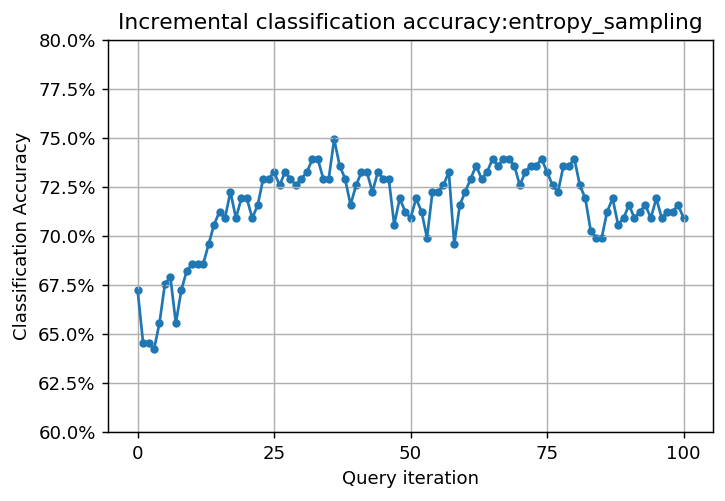

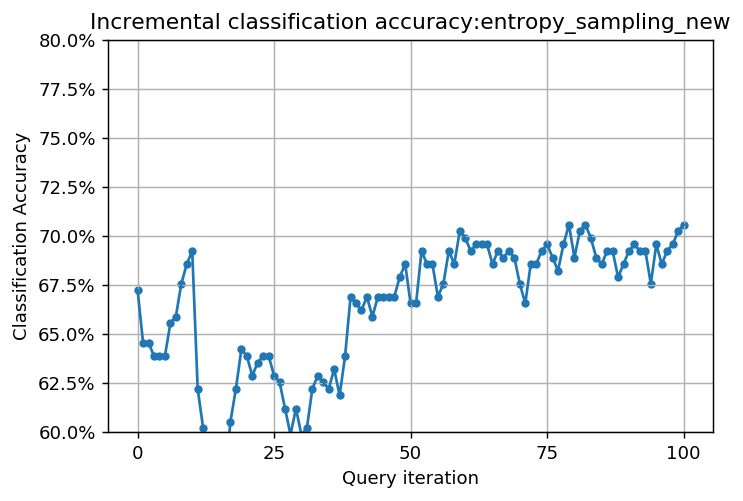

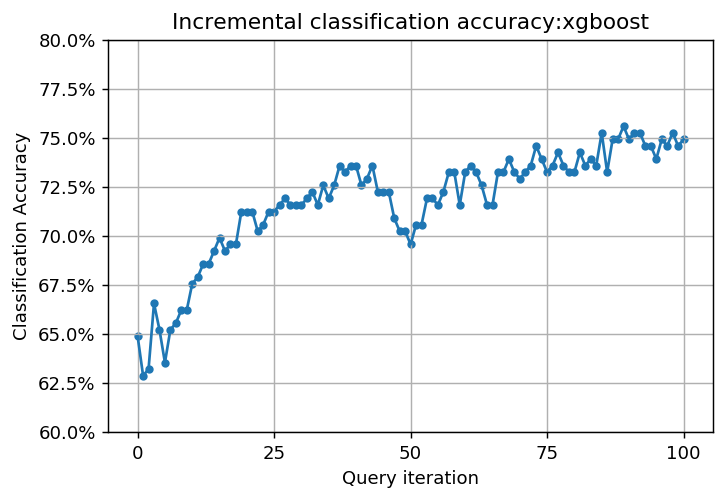

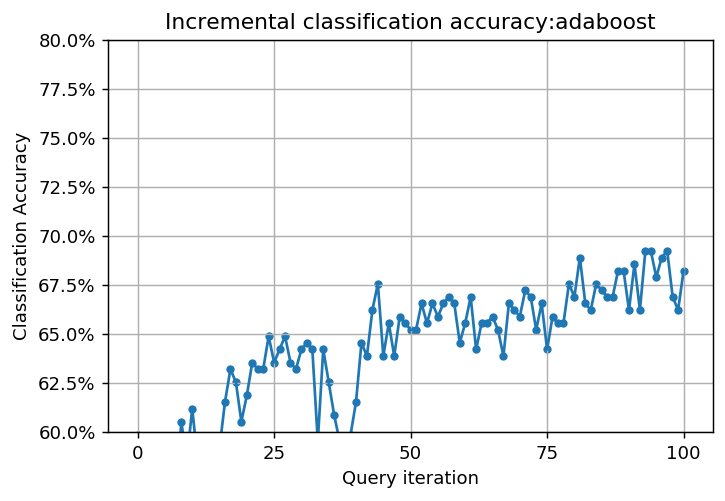

In [47]:
draw_plot(performance_history0,"entropy_sampling")
draw_plot(performance_history1,"entropy_sampling_new")
draw_plot(performance_history2,"xgboost")
draw_plot(performance_history3,"adaboost")

init idx: [205 521  38 132 668 386 570 725 695 367 498 143 628  73 335  50 101 118
 462 784]
init accuracy:  0.6956521739130435
init idx: [437 637  53 238 328 179 186 276 671 768 136 634 388  96  71 208 790 630
 157  19]
init accuracy:  0.5819397993311036
init idx: [285 661 544 664 378 769 643 575 223 734 291 214 369 409 546 110 278 280
 297 492]
init accuracy:  0.5183946488294314
init idx: [670 663 123  80 350 632 432 498  91 612 347 146 653 457 141   2 323 483
 639 416]
init accuracy:  0.44816053511705684
init idx: [658 527  44  62 253 547 483 491 343 308 503 369   4 690 268 575 685 494
 489 354]
init accuracy:  0.7324414715719063


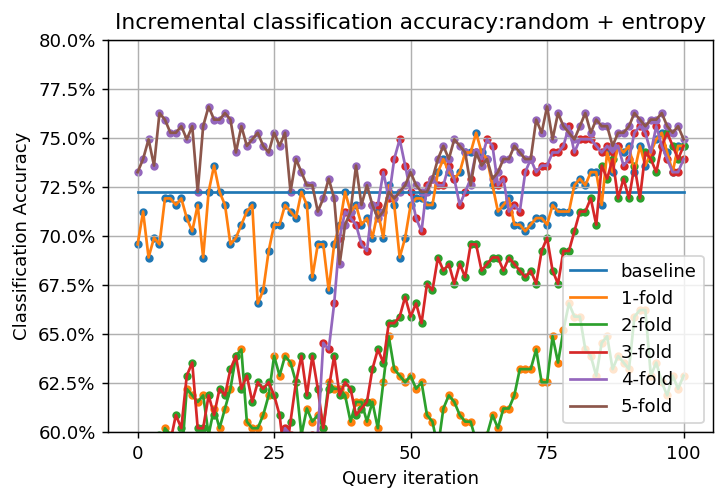

---------------------------------------------------------------------------------------------
init idx: [144 399 437 561 423 188 543 560  42 200 623 662  42 623 216 535 752  89
 374 181]
init accuracy:  0.6421404682274248
init idx: [157 321 700  27 642  84 553  23 525 422 317 473 317 780 346 177 567 105
 236 299]
init accuracy:  0.5986622073578596
init idx: [ 60 225 502 169 791 131 167 608 735  31 153 532 692  46 338 697 655 519
 510 129]
init accuracy:  0.6321070234113713
init idx: [604 363 182 607 532 462  56 415 769 680  88 410 655  89 740 299 657 389
 347 199]
init accuracy:  0.7424749163879598
init idx: [ 40 325 668 316 656 574 133 565 335 393 201 200 638 753 105 126 437 152
 581 420]
init accuracy:  0.5652173913043478


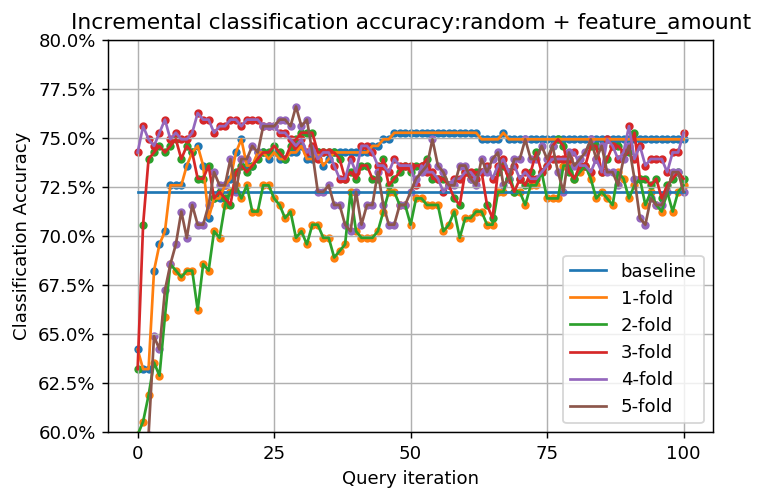

---------------------------------------------------------------------------------------------
init idx: [307 355 654 714 730  69 353 297  88 465 750 313 165 360  80 285 727 663
 767 389]
init accuracy:  0.6989966555183946
init idx: [749 480 632 472 314 276 728 480  54 143 613 220   5 424 703 571 305  53
  43 287]
init accuracy:  0.7157190635451505
init idx: [613 769 759   5 361 121 680 531 159 766 112 726 635 760 583 582 647 716
 529 588]
init accuracy:  0.6254180602006689
init idx: [101 467 230 492 661 265 373 722 425 430 589 445 484 250 258 297 715 674
 700 219]
init accuracy:  0.5150501672240803
init idx: [423 772 597 653  81 250 462 443 611 776  51 291 613 674 144 128 466 101
 699 745]
init accuracy:  0.7357859531772575


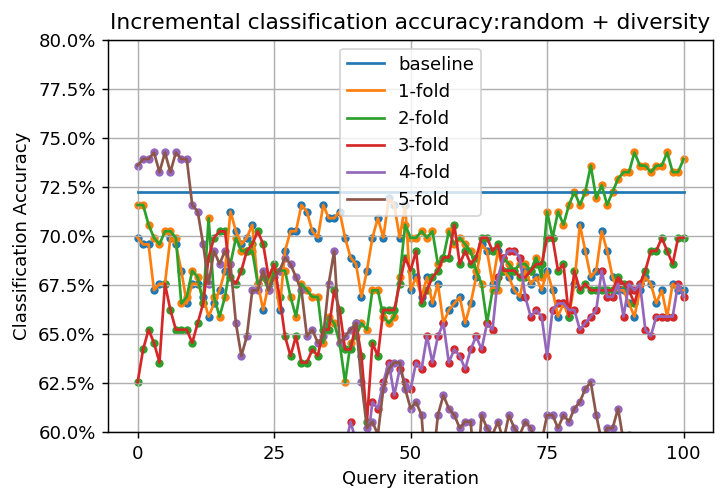

---------------------------------------------------------------------------------------------
init idx: [273 707 254 539 373 760 280 447 341 344 571 589 577 760  63 103 635 343
 404 527]
init accuracy:  0.411371237458194
init idx: [258 136 538 249 412 639 178 308 370 565 705 363 612 568 489 536   7 339
 483 169]
init accuracy:  0.5551839464882943
init idx: [596 377 674 271 419 561 295 255 510 120 521 342  19 432 422 749 233 752
 634 435]
init accuracy:  0.7023411371237458
init idx: [  2 410  41 417 450 666 138  46 663  95 761 479  12  33 415 271 225 763
 550 532]
init accuracy:  0.6421404682274248
init idx: [299 771 750 131 625  97 338 244  16 627 119 409 230 740 518 588  79 751
 193 436]
init accuracy:  0.5484949832775919


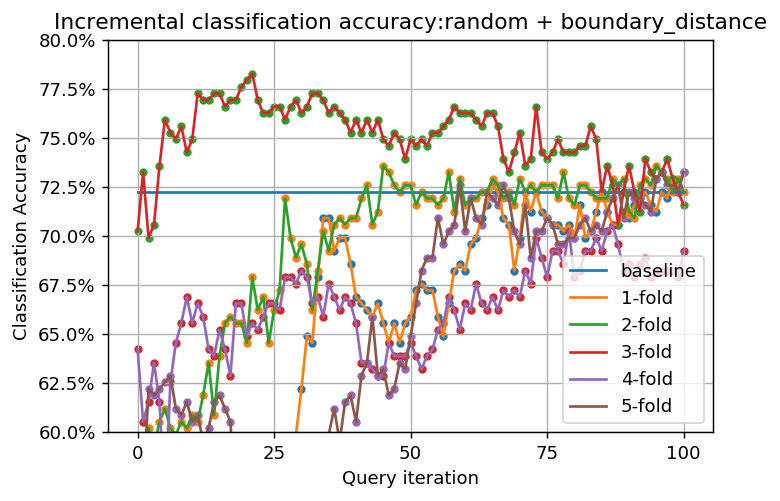

---------------------------------------------------------------------------------------------
init idx: [278, 30, 613, 184, 439, 122, 103, 314, 221, 735, 578, 516, 8, 126, 120, 139, 251, 380, 536, 604]
init accuracy:  0.5719063545150501
init idx: [51, 30, 356, 292, 376, 3, 164, 547, 263, 457, 320, 365, 136, 259, 724, 306, 311, 305, 688, 360]
init accuracy:  0.6688963210702341
init idx: [148, 608, 285, 265, 472, 522, 53, 440, 55, 401, 471, 337, 192, 347, 688, 413, 8, 177, 774, 782]
init accuracy:  0.6555183946488294
init idx: [717, 347, 102, 483, 377, 137, 547, 323, 35, 523, 671, 123, 87, 99, 225, 374, 135, 469, 428, 97]
init accuracy:  0.5217391304347826
init idx: [483, 4, 424, 37, 713, 177, 505, 472, 513, 85, 296, 308, 183, 350, 20, 293, 348, 151, 676, 75]
init accuracy:  0.6923076923076923


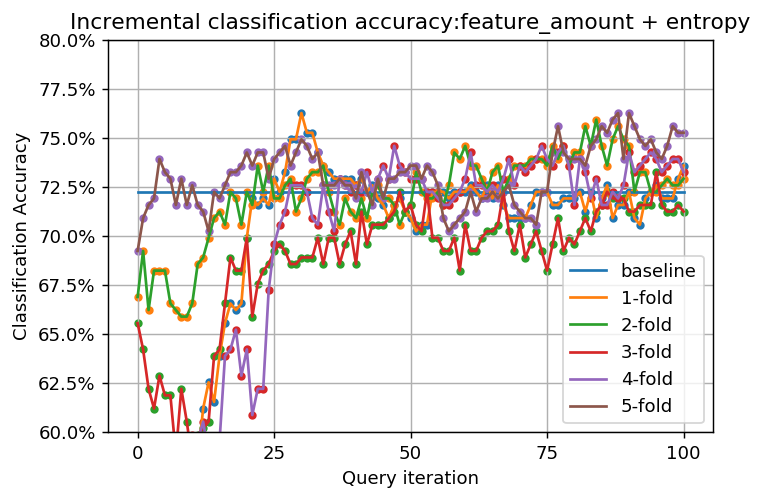

---------------------------------------------------------------------------------------------
init idx: [367, 640, 185, 108, 247, 65, 700, 48, 355, 186, 38, 147, 123, 373, 420, 515, 526, 693, 14, 493]
init accuracy:  0.6220735785953178
init idx: [490, 46, 435, 453, 786, 685, 245, 396, 215, 140, 490, 253, 478, 155, 289, 183, 278, 576, 287, 786]
init accuracy:  0.5819397993311036
init idx: [91, 423, 468, 735, 740, 154, 688, 247, 640, 214, 589, 136, 520, 785, 279, 190, 474, 203, 245, 504]
init accuracy:  0.5551839464882943
init idx: [66, 365, 244, 678, 772, 161, 705, 523, 297, 115, 198, 154, 572, 584, 344, 266, 126, 556, 744, 251]
init accuracy:  0.49498327759197325
init idx: [472, 522, 359, 537, 398, 731, 54, 323, 724, 727, 240, 496, 67, 588, 771, 499, 29, 306, 15, 194]
init accuracy:  0.5919732441471572


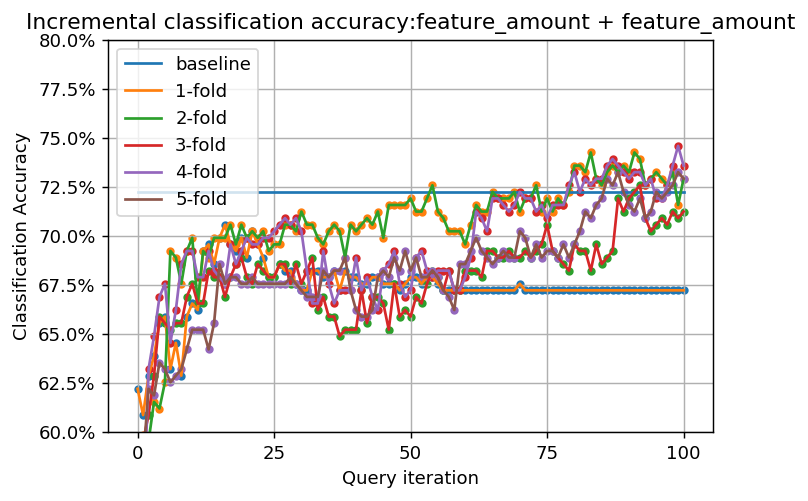

---------------------------------------------------------------------------------------------
init idx: [369, 271, 419, 493, 391, 226, 484, 142, 13, 454, 708, 111, 5, 249, 355, 485, 515, 502, 342, 132]
init accuracy:  0.6622073578595318
init idx: [313, 378, 75, 695, 316, 510, 310, 536, 238, 471, 102, 139, 376, 332, 435, 88, 187, 516, 250, 633]
init accuracy:  0.7090301003344481
init idx: [271, 139, 411, 50, 251, 69, 58, 745, 17, 124, 382, 129, 712, 77, 586, 286, 393, 695, 172, 19]
init accuracy:  0.6789297658862876
init idx: [120, 471, 363, 85, 63, 468, 155, 512, 51, 374, 166, 563, 556, 239, 640, 415, 687, 478, 446, 204]
init accuracy:  0.6488294314381271
init idx: [164, 131, 225, 56, 457, 124, 36, 382, 496, 183, 577, 394, 671, 548, 40, 122, 145, 346, 646, 141]
init accuracy:  0.68561872909699


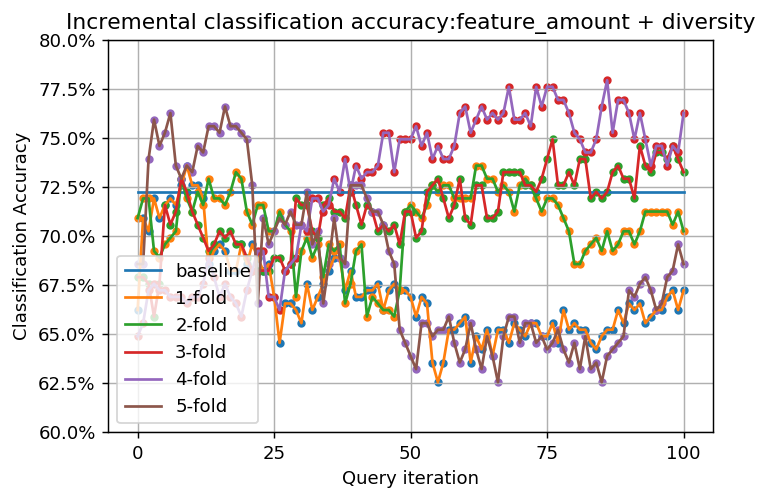

---------------------------------------------------------------------------------------------
init idx: [671, 13, 64, 19, 502, 421, 481, 38, 345, 204, 148, 485, 352, 678, 640, 604, 5, 715, 144, 173]
init accuracy:  0.6822742474916388
init idx: [198, 141, 467, 342, 478, 484, 687, 568, 43, 223, 464, 40, 744, 49, 510, 423, 102, 567, 54, 499]
init accuracy:  0.5083612040133779
init idx: [434, 232, 421, 289, 419, 116, 478, 441, 305, 242, 436, 252, 247, 240, 362, 505, 62, 580, 735, 511]
init accuracy:  0.6923076923076923
init idx: [584, 687, 81, 474, 556, 207, 233, 632, 402, 774, 32, 469, 519, 145, 219, 261, 319, 647, 535, 774]
init accuracy:  0.68561872909699
init idx: [777, 100, 385, 1, 200, 677, 260, 381, 303, 210, 85, 548, 522, 498, 244, 160, 258, 355, 220, 307]
init accuracy:  0.5183946488294314


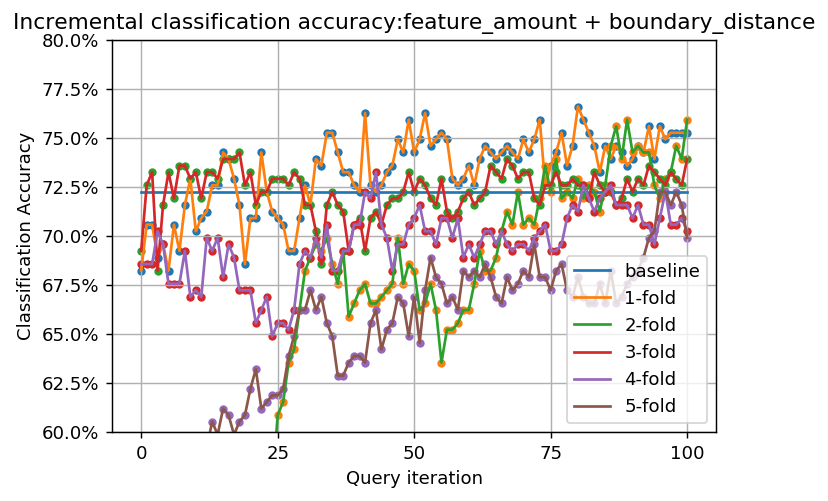

---------------------------------------------------------------------------------------------


In [ ]:
#using svm and kfold
#mapping through different initial_strategy(3 methods) and query_strategy(4 methods)
from sklearn.model_selection import StratifiedKFold

sfolder = StratifiedKFold(n_splits=5,random_state=0,shuffle=False)
initial_strategy = ["random","feature_amount","diversity"]
query_strategy = ["entropy","feature_amount","diversity","boundary_distance"]
# best tuned random forest
forest = RandomForestClassifier(n_estimators=200 , n_jobs=-1 , random_state=386, max_depth = 10, min_samples_split = 5,min_samples_leaf = 1,oob_score = True)
linear_SVM = SVC(kernel='linear', C=0.1, random_state=0,probability=True),
myestimator = forest


for init in initial_strategy:
    for query in query_strategy:
        performance_history4_all = [] # record all score
        #cross validation
        for train_idx, test_idx in sfolder.split(X_train_std,y_train):
            #by changing variable 'idx' , changes the initialized 20 datas for learning
            #random indexing
            if init == "random":
                idx = np.random.randint(train_idx.shape[0], size=20)

            #index with more features(only choose standardize features>0)
            if init == "feature_amount":
                train_idx_tmp = []
                tmp = 0
                for i in train_idx:
                    if X_train_std[i, 6] > 0.3:
                        train_idx_tmp.append(tmp)
                    tmp += 1
                idx = random.choices(train_idx_tmp,k=20)
                #print( X_train_std[train_idx[idx],6])

            #index with more diversity
            if init == "diversity":
                idx1 = np.random.randint(train_idx.shape[0], size=1)
                idx = np.array(idx1)
                dist = 0
                for i in range(19):
                    tmp = 1
                    while(tmp):
                        idx2 = np.random.randint(train_idx.shape[0], size=1)
                        tmp = 0
                        for j in idx:
                            a = X_train_std[train_idx[j],:]
                            b = X_train_std[train_idx[idx2],:]
                            dist = np.linalg.norm(a-b)
                            if dist<6:
                                tmp = 1
                        if(tmp!=1):
                            idx = np.append(idx,idx2)

            np_raw_X,np_raw_Y,np_train_X,np_train_Y,np_pool_X,np_pool_Y = init_param2()
            #print(np_pool_X.shape,np_train_X.shape,np_raw_X.shape)
            
            if query == "entropy":
                learner4 = ActiveLearner(
                    estimator=myestimator,
                    X_training=np_train_X, y_training=np_train_Y,
                    query_strategy=entropy_sampling,
                )
            elif query == "feature_amount":
                learner4 = ActiveLearner(
                    estimator=myestimator,
                    X_training=np_train_X, y_training=np_train_Y,
                    query_strategy=feature_sampling,
                )
            elif query == "diversity":
                learner4 = ActiveLearner(
                    estimator=myestimator,
                    X_training=np_train_X, y_training=np_train_Y,
                    query_strategy=diversity_sampling,
                )
            else: #query=boundary distance
                learner4 = ActiveLearner(
                    estimator=myestimator,
                    X_training=np_train_X, y_training=np_train_Y,
                    query_strategy=entropy_sampling,
                )
            learner4,performance_history4 = active_training(learner4)
            #draw_plot(performance_history4,"entropy_sampling")
            performance_history4_all.append(performance_history4)

        draw_plot_multi_line(performance_history4_all,baseline_accuracy,init+ " + "+ query)
        print("---------------------------------------------------------------------------------------------")
